In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

In [12]:
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [171]:
df_train, df_test = train_test_split(df, test_size=0.33)
print(df_train.shape)
print(df_test.shape)


(538, 12)
(266, 12)


In [187]:
price = df[['Price']]
price_train = np.array(price[:-20])
price_test = np.array(price[-20:])
print("Test", price_test.shape)


Test (20, 1)


array([[ 17314.1031289 ],
       [ 17542.03608328],
       [ 16218.84786194],
       [ 16336.91314005],
       [ 16339.17032393],
       [ 15709.05282108],
       [ 15230.00338985],
       [ 15048.04218412],
       [ 14862.0938696 ],
       [ 15295.01826688],
       [ 21335.85248489],
       [ 20538.08751023],
       [ 20512.09409124],
       [ 19924.1590524 ],
       [ 19774.24906607],
       [ 19344.16553736],
       [ 19105.13012442],
       [ 18543.42704537],
       [ 17808.19899602],
       [ 17968.83827826],
       [ 22358.87767812],
       [ 23785.92252638],
       [ 22926.09037126],
       [ 21895.7587842 ],
       [ 21273.06171392],
       [ 21460.01395289],
       [ 21183.12358742],
       [ 20406.09950289],
       [ 21058.13957995],
       [ 19556.89932029],
       [ 23447.68656101],
       [ 23547.23944288],
       [ 23016.00800868],
       [ 22230.02750256],
       [ 22625.07356605],
       [ 21799.17209689],
       [ 21341.25720707],
       [ 21683.03146355],
       [ 209

(784, 1)
(784, 1)
(20, 1)
(20, 1)
-6.14930336277


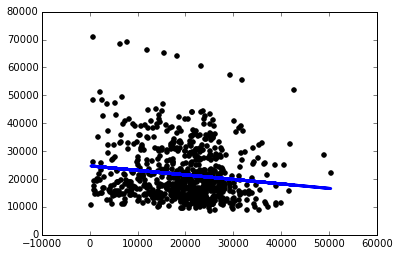

In [188]:
input_data_train = np.array(df[['Mileage']][:-20])
input_data_test = np.array(df[['Mileage']][-20:])

print(input_data_train.shape)
print(price_train.shape)
print(input_data_test.shape)
print(price_test.shape)


regr1 = linear_model.LinearRegression()
regr1.fit(input_data_train, price_train)
print(regr1.score(input_data_test, price_test))
plt.scatter(input_data_train, price_train,  color='black')
plt.plot(input_data_train, regr1.predict(input_data_train), color='blue', linewidth=3)

In [165]:
df_train[["Price"]]

0.027826310063


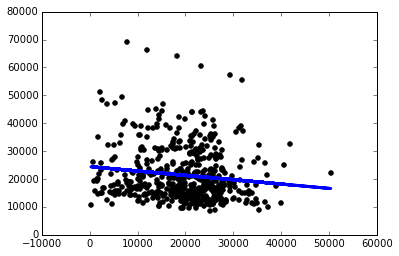

In [172]:
regr1 = linear_model.LinearRegression()
regr1.fit(df_train[["Mileage"]], df_train[["Price"]])
print(regr1.score(df_test[["Mileage"]], df_test[["Price"]]))
plt.scatter(df_train[["Mileage"]], df_train[["Price"]],  color='black')
plt.plot(df_train[["Mileage"]], regr1.predict(df_train[["Mileage"]]), color='blue', linewidth=3)

# The linear regression line has a .02 % accuracy.  It is not a good standard to perdict by

In [157]:
input_data = ['Mileage', "Cylinder", "Liter", "Doors", "Cruise", "Sound",]
regr1 = linear_model.LinearRegression()
regr1.fit(df_train[input_data], df_train[["Price"]])
print(regr1.score(df_test[input_data], df_test[["Price"]]))
plt.scatter(input_data, price,  color='black')
plt.plot(input_data, regr1.predict(input_data), color='blue', linewidth=3)

0.406849854009


In [147]:
input_data = df[['Mileage', "Cylinder",  "Liter", "Doors","Cruise", "Sound"]]
price = df[['Price']]
regr1 = linear_model.LinearRegression()
regr1.fit(input_data, price)
print(regr1.score(input_data, price))

0.42441824018
